In [160]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
# importa arquivo externo contendo dados para o report
RAW = pd.read_excel("AdventureWorks.xlsx")

In [162]:
# faz copia do dataframe pandas e inspeciona dados
df = RAW
df.head(6)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
5,2008-07-12,2008-07-20,306,384,19054,200807123CS588,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [163]:
# quantidade de linhas e colunas
df.shape

(904, 16)

In [164]:
# tipo dos dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [165]:
# conta valores null ou NA
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [166]:
# arredonda tipos float para 2 casas decimais e inspeciona dados
df["Custo Unitário"] = (df["Custo Unitário"]).round(2)
df["Preço Unitário"] = (df["Preço Unitário"]).round(2)
df["Valor Desconto"] = (df["Valor Desconto"]).round(2)
df["Valor Venda"] = (df["Valor Venda"]).round(2)
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
102,2008-06-22,2008-07-04,199,1226,18848,200806224CS620,330.99,999.0,6,0.0,5994.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
111,2008-10-25,2008-10-30,199,1155,18881,200810254CS786,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
181,2009-05-05,2009-05-18,199,1178,18939,200905054CS848,330.66,998.0,12,0.0,11976.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White
502,2008-06-09,2008-06-13,307,1155,19100,200806094CS596,324.69,980.0,7,686.0,6174.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
417,2008-12-18,2008-12-23,307,1178,19111,200812184CS669,330.66,998.0,9,1347.3,7634.7,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White


In [167]:
# verifica o intervalo dos dados de vendas
pd.unique(df["Data Venda"].dt.year)

array([2008, 2009])

Obseva-se que a coluna "No. Venda" não representa um ID de venda único.
Abaixo foi explorado alguns desses registros **negrito**


In [168]:
# verifica se há duplicados no número da venda
pd.unique(df["No. Venda"]).shape

(821,)

In [169]:
#cria dataframe cujo "No. Venda" não é único, porém só insere novos valores a partir da segunda entrada repetida.
#em uma ambiente de produção, para validação, seria necessário confirmar que cada "No. Venda" venda repetida corresponde ao mesmo "ID Cliente".
df_dupli = df.loc[df.duplicated(subset=['No. Venda']) == True]

In [170]:
# inspeciona os valores repetidos, sabendo que não representa o total não único
df_dupli.shape

(83, 16)

In [171]:
df_dupli.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
131,2008-05-14,2008-05-20,306,366,19052,200805143CS576,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black
743,2008-09-22,2008-10-03,306,2497,19057,200809225CS636,5.09,9.99,108,107.89,971.03,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White
858,2009-03-05,2009-03-09,199,1178,18920,200903054CS828,330.66,998.00,6,299.40,5688.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White
662,2008-12-12,2008-12-16,306,1202,19060,200812124CS676,330.66,998.00,5,998.00,3992.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
845,2008-01-04,2008-01-14,306,1203,19046,200801044CS525,324.69,980.00,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey


In [172]:
# ordena e inspeciona mais elementos
df_dupli.sort_values(by=['No. Venda']).head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
599,2008-01-02,2008-01-12,306,1155,19046,200801024CS525,324.69,980.0,8,1568.0,6272.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
573,2008-01-04,2008-01-14,306,1178,19046,200801044CS525,330.66,998.0,8,1596.8,6387.2,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White
845,2008-01-04,2008-01-14,306,1203,19046,200801044CS525,324.69,980.0,6,1176.0,4704.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
554,2008-01-12,2008-01-22,306,1203,19046,200801124CS525,324.69,980.0,4,784.0,3136.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
655,2008-01-20,2008-01-30,199,1202,18816,200801204CS560,330.66,998.0,5,249.5,4740.5,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey


**Relatório anual de faturamento e lucro por loja (ID Loja)**

In [173]:
# cria coluna contendo o lucro de cada venda
df["Lucro"] = df["Valor Venda"]-(df["Custo Unitário"]*df["Quantidade"])

In [174]:
# conta número de lojas, cuja performance de vendas será comparada
pd.unique(df["ID Loja"]).shape

(3,)

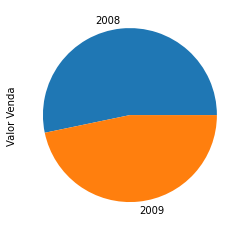

In [175]:
# gráfico de pizza comparando o faturamento bruto por ano
df.groupby(df["Data Venda"].dt.year)["Valor Venda"].sum().plot.pie();

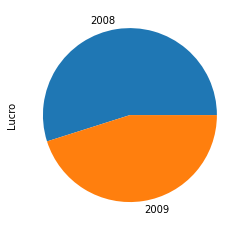

In [176]:
# gráfico de pizza comparando o lucro total por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.pie();

In [177]:
# cria dois filtros para separar a chamada dos relatórios de 2008 e 2009, respectivamente
# faturamento anual
filtro1 = df.loc[df["Data Venda"].dt.year == 2008]
filtro2 = df.loc[df["Data Venda"].dt.year == 2009]

df_fat1 = filtro1.groupby("ID Loja")["Valor Venda"].sum()
df_fat1.name = "Faturamento por loja em 2008"

df_fat2 = filtro2.groupby("ID Loja")["Valor Venda"].sum()
df_fat2.name = "Faturamento por loja em 2009"
print(df_fat1, "\n", df_fat2)
# visualisa os faturamentos em valores

ID Loja
199    1205563.51
306     973490.77
307    1008553.29
Name: Faturamento por loja em 2008, dtype: float64 
 ID Loja
199     975540.56
306     750362.81
307    1071095.11
Name: Faturamento por loja em 2009, dtype: float64


In [178]:
# lucro anual
df_lucro1 = filtro1.groupby("ID Loja")["Lucro"].sum()
df_lucro1.name = "Lucro por loja em 2008"

df_lucro2 = filtro2.groupby("ID Loja")["Lucro"].sum()
df_lucro2.name = "Lucro por loja em 2009"
print(df_lucro1, "\n", df_lucro2)
# visualisa os lucros em valores

ID Loja
199    738540.76
306    593037.45
307    588499.42
Name: Lucro por loja em 2008, dtype: float64 
 ID Loja
199    556177.73
306    423455.64
307    598112.00
Name: Lucro por loja em 2009, dtype: float64


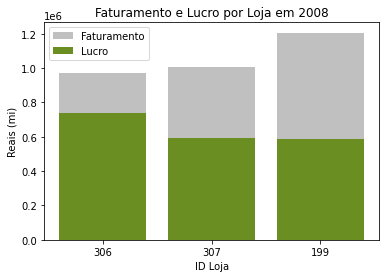

In [179]:
# gráfico de barras com o stack lucro/faturamento
label = list(set(df['ID Loja'].astype(str))) #converte ID da loja para string

# 2008
fig, ax = plt.subplots()

ax.bar(label, df_fat1.sort_values(), label='Faturamento', color='#C0C0C0')
ax.bar(label, df_lucro1, label='Lucro', color='#6B8E23')

ax.set_title('Faturamento e Lucro por Loja em 2008')
ax.set_xlabel("ID Loja")
ax.set_ylabel('Reais (mi)')
ax.legend();

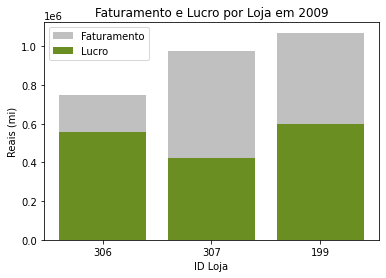

In [180]:
# 2009
fig, ax = plt.subplots()

ax.bar(label, df_fat2.sort_values(), label='Faturamento', color='#C0C0C0')
ax.bar(label, df_lucro2, label='Lucro', color='#6B8E23')

ax.set_title('Faturamento e Lucro por Loja em 2009')
ax.set_xlabel("ID Loja")
ax.set_ylabel('Reais (mi)')
ax.legend();

In [181]:
# analisa os produtos que deram maior lucro no biênio
df_lucroByprod = df.groupby("Produto")["Lucro"].sum()
df_lucroByprod

Produto
Adventure Works Laptop15.4W M1548 Black            367185.56
Adventure Works Laptop15.4W M1548 Red              344850.68
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black        507214.23
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey         501926.50
Fabrikam Trendsetter 1/3'' 8.5mm X200 White        453138.34
Fabrikam Trendsetter 2/3'' 17mm X100 Black         520733.86
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          608098.97
Headphone Adapter for Contoso Phone E130 Silver     98160.46
Headphone Adapter for Contoso Phone E130 White      96514.40
Name: Lucro, dtype: float64

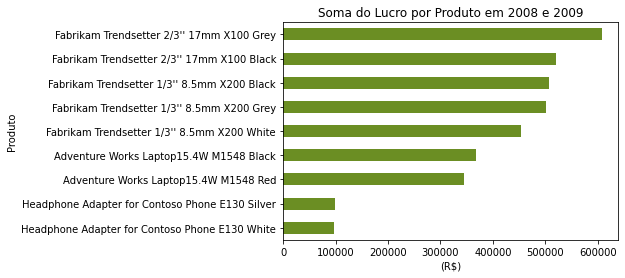

In [182]:
# gráfico de barras horizontal rankeando o lucro por produto no biênio
fig, ax = plt.subplots()
df_lucroByprod.sort_values().plot.barh(color='#6B8E23')
ax.set_xlabel("(R$)")
ax.set_title('Soma do Lucro por Produto em 2008 e 2009');
#ax.legend();

**Identifica problemas de despacho dos produtos analisando outliers**

In [183]:
# crida dataframe contendo apenas datas
df_days = df[["Data Venda", "Data Envio"]]
df_days["Despacho"] = df_days["Data Envio"] - df_days["Data Venda"]
df_days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Data Venda,Data Envio,Despacho
0,2008-05-09,2008-05-29,20 days
1,2008-05-12,2008-05-17,5 days
2,2008-05-14,2008-05-20,6 days
3,2008-05-21,2008-05-27,6 days
4,2008-06-20,2008-06-27,7 days
...,...,...,...
899,2008-03-22,2008-04-04,13 days
900,2008-10-04,2008-10-15,11 days
901,2008-12-11,2008-12-15,4 days
902,2008-12-17,2008-12-21,4 days


In [184]:
# analisa estatística
df_days["Despacho"].dt.days.describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Despacho, dtype: float64

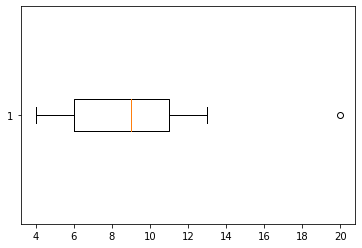

In [185]:
plt.boxplot(df_days["Despacho"].dt.days, vert=False);

In [186]:
# foi identificado apenas 1 outlier no conjunto de dados
#df_days[df_days["Despacho"].dt.days >= 20]["Despacho"].count()
outlier = df_days.loc[df_days["Despacho"].dt.days == 20].index

In [187]:
df.iloc[outlier]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2456.52
